Movie recommendation system.
The dataset is composed by ID,movie and genres

In [1]:
import pandas as pd
uri_movies = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
movies = pd.read_csv(uri_movies)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
genre  = movies.genres.str.get_dummies()

In [3]:
moviesData = pd.concat([movies,genre], axis = 1)
moviesData.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
# escalando os dados p saber quais generos sãão mais importantes para classificar

scaler = StandardScaler()
scalledGenres = scaler.fit_transform(genre)
scalledGenres



array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Criando um modelo para  o agrupamento (clusterização)

In [5]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 3)

modelo.fit(scalledGenres)

print('Grupos: {}' .format(modelo.labels_))


Grupos: [0 0 1 ... 1 0 1]


In [6]:
print(modelo.cluster_centers_)


[[-5.91799474e-02  6.29293667e-01  1.58032033e+00  1.20525377e+00
   1.23346053e+00  1.79287847e-03 -2.69409635e-01 -2.11544482e-01
  -6.04795676e-01  8.45375349e-01 -8.83642173e-02 -2.82703779e-01
   5.16670324e-01  1.71178902e-01 -1.79149625e-01 -2.95866893e-01
   4.88495098e-01 -1.94900576e-01 -6.20879935e-02  1.06027172e-02]
 [ 2.74252873e-02 -1.43946991e-01 -3.15739106e-01 -2.41950788e-01
  -2.44820616e-01  1.01666754e-01  5.28982091e-02  9.64492162e-02
   2.15091852e-01 -1.95121014e-01  2.47542003e-03 -3.34055205e-01
  -1.11747790e-01 -7.62171032e-03 -2.45517172e-01  1.36940853e-01
  -2.24565152e-01 -1.52296553e-01  5.56979534e-02  1.25958266e-02]
 [-5.91799474e-02 -4.17751665e-02 -3.12794344e-01 -2.33341102e-01
  -2.51491613e-01 -4.63959076e-01  5.75428192e-02 -2.04341550e-01
  -3.08598950e-01 -4.81825773e-02  8.64649562e-02  1.83057039e+00
  -6.35500914e-02 -1.54656720e-01  1.31374075e+00 -2.95092760e-01
   4.80251301e-01  9.07561153e-01 -1.84435991e-01 -6.89602864e-02]]


visualizando melhor a pontuação dada pela clusterização:

In [9]:
groups = pd.DataFrame(modelo.cluster_centers_,
             columns=genre.columns)
groups

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.629294,1.580320,1.205254,1.233461,0.001793,-0.269410,-0.211544,-0.604796,0.845375,-0.088364,-0.282704,0.516670,0.171179,-0.179150,-0.295867,0.488495,-0.194901,-0.062088,0.010603
1,0.027425,-0.143947,-0.315739,-0.241951,-0.244821,0.101667,0.052898,0.096449,0.215092,-0.195121,0.002475,-0.334055,-0.111748,-0.007622,-0.245517,0.136941,-0.224565,-0.152297,0.055698,0.012596
2,-0.059180,-0.041775,-0.312794,-0.233341,-0.251492,-0.463959,0.057543,-0.204342,-0.308599,-0.048183,0.086465,1.830570,-0.063550,-0.154657,1.313741,-0.295093,0.480251,0.907561,-0.184436,-0.068960


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dedef22e8>,
      dtype=object)

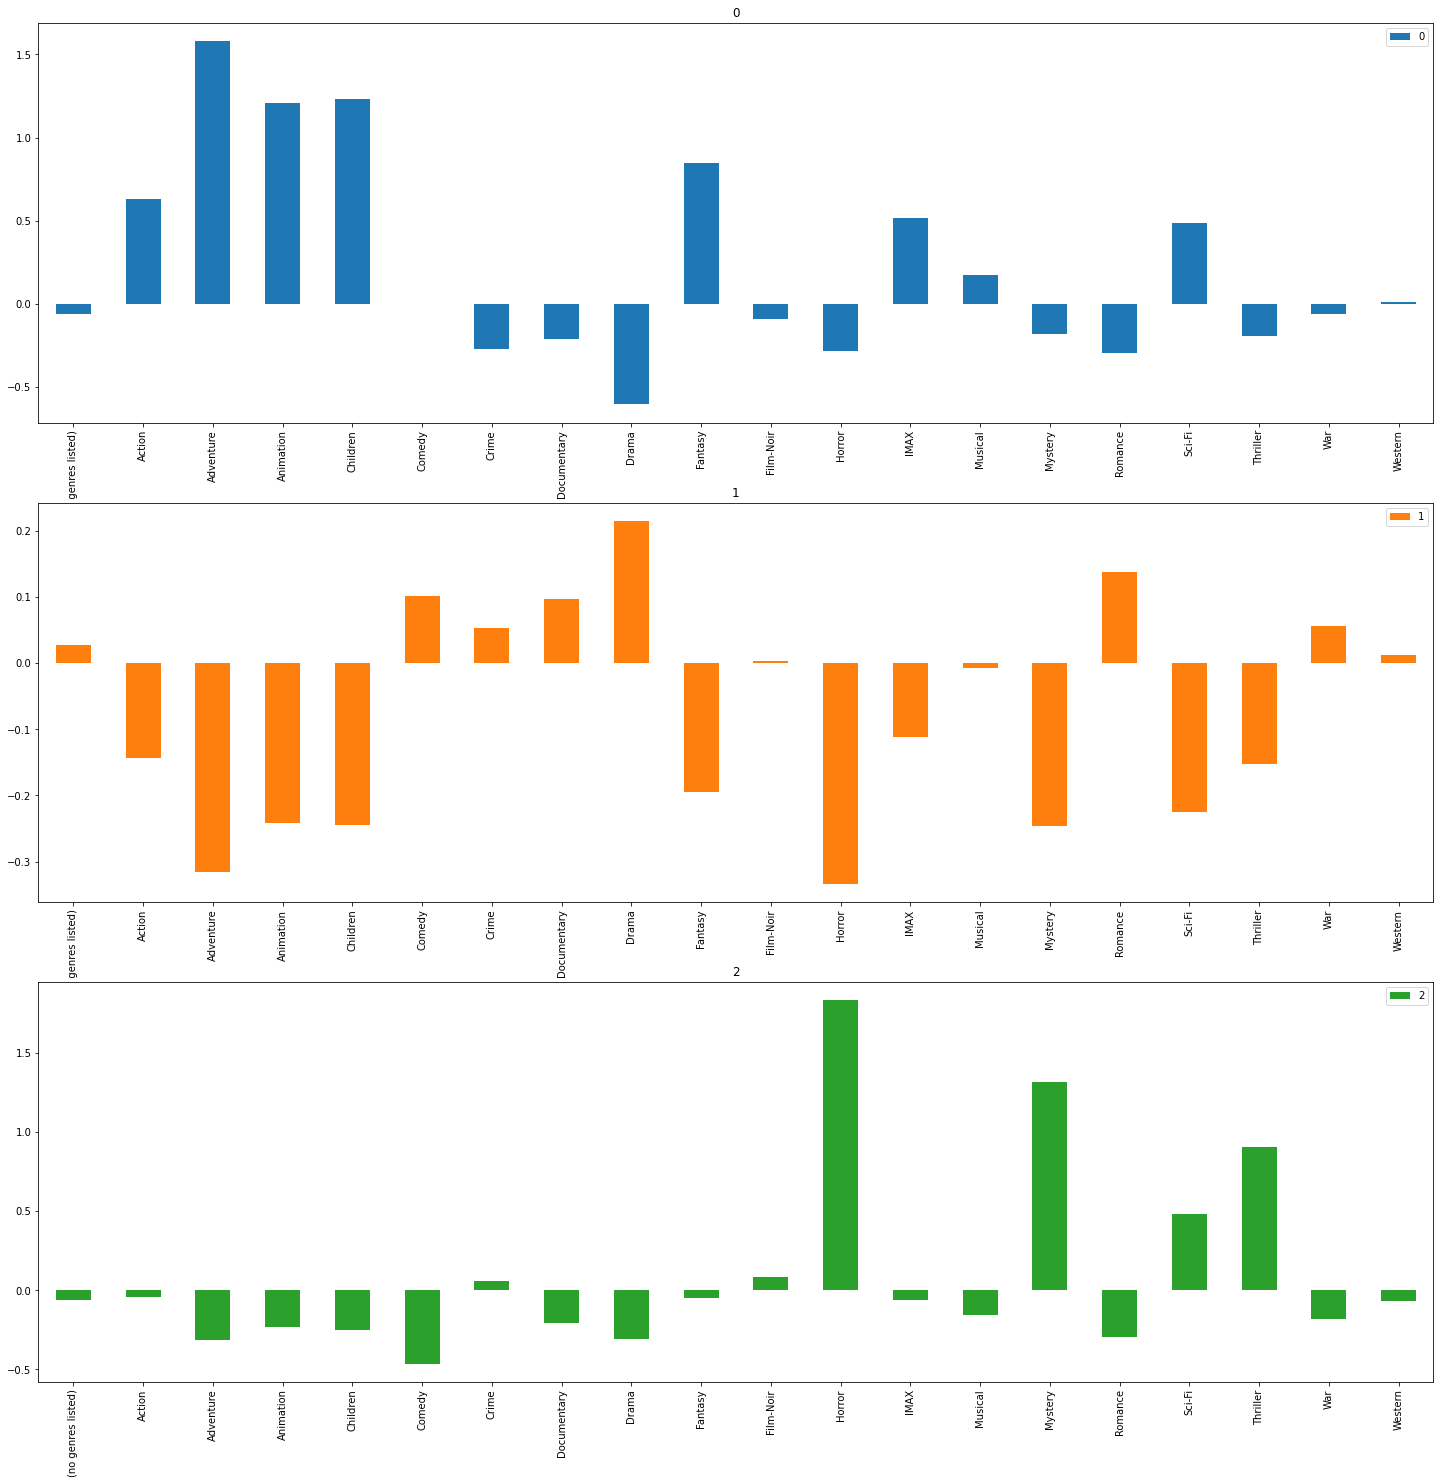

In [18]:
groups.transpose().plot.bar(subplots =True,figsize=(25,25), sharex=False)

Filtro para fazer a recomendação:


In [20]:
Grupo = 0
filtro = modelo.labels_ == Grupo
moviesData[filtro].sample(7)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7030,68791,Terminator Salvation (2009),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7646,88140,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
5665,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
7492,82765,Little Big Soldier (Da bing xiao jiang) (2010),Action|Adventure|Comedy|Drama|War,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6015,38038,Wallace & Gromit in The Curse of the Were-Rabb...,Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2807,3752,"Me, Myself & Irene (2000)",Adventure|Comedy,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5572,26776,Porco Rosso (Crimson Pig) (Kurenai no buta) (1...,Adventure|Animation|Comedy|Fantasy|Romance,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
